21 - Dados los nodos 

$$ log_2( 2) = 1 , log_2( 4) = 2 , log_2( 8) = 3 \quad y \quad log_2( 16) = 4 $$

Construya el trazador cúbico natural que aproxima log2(x) en [2, 16].

 Use el trazador para aproximar log2(7.1) y log2( 12). 

En cada caso, calcule el valor exacto y el error. Grafique la función original y el trazador en un mismo plano cartesiano.

[0.5*x, 0.25*x + 1.0, 0.125*x + 2.0]
El trazador 1 es: 0.5*x 

El trazador 2 es: 0.25*x + 1.0 

El trazador 3 es: 0.125*x + 2.0 

Para aproximar el valor de f(7.1) utilizamos el trazador 2:
El valor aproximado de f(7.1) es :  2.775
El valor exacto de f(7.1) es:  2.8278190246173196
El error de aproximación en f(7.1) es:  0.05281902461731969 

Para aproximar el valor de f(12) utilizamos el trazador 3:
El valor aproximado de f(12) es :  3.5
El valor exacto de f(12) es:  3.584962500721156
El error de aproximación en f(12) es:  0.08496250072115608 

El gráfico de los elementos es(En rojo la función original y en verde las secciones de los polinomios):


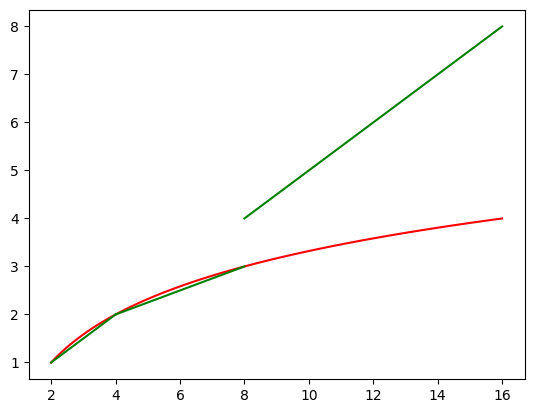

In [20]:
from matplotlib import pyplot
from numpy import linspace, log2

from metodos_interpolacion import trazador_cubico_natural


datos_x = [2, 4, 8, 16]
datos_y = [1, 2, 3, 4]

resultado = trazador_cubico_natural(datos_x, datos_y)
contador = 1
for pol in resultado[2]:
    print(f"El trazador {contador} es:", pol, "\n")
    contador += 1

# defino los trazadores resultantes para usarlos en el gráfico

def trazador_1(x):
    return 0.5*x

def trazador_2(x):
    return 0.25 * x + 1.0

def trazador_3(x):
    return 0.125 * x + 2.0

print("Para aproximar el valor de f(7.1) utilizamos el trazador 2:")
valor_aproximado_1 = trazador_2(7.1)
print("El valor aproximado de f(7.1) es : ", valor_aproximado_1)
valor_exacto_1 = log2(7.1)
print("El valor exacto de f(7.1) es: ", valor_exacto_1)
error_1 = abs(valor_exacto_1 - valor_aproximado_1)
print("El error de aproximación en f(7.1) es: ", error_1, "\n" )

print("Para aproximar el valor de f(12) utilizamos el trazador 3:")
valor_aproximado_2 = trazador_3(12)
print("El valor aproximado de f(12) es : ", valor_aproximado_2)
valor_exacto_2 = log2(12)
print("El valor exacto de f(12) es: ", valor_exacto_2)
error_2 = abs(valor_exacto_2 - valor_aproximado_2)
print("El error de aproximación en f(12) es: ", error_2, "\n" )

# generamos los arrays de puntos para la función original
x = linspace(2, 16, 100)

# Para y genero primero los y exacto, es la parte fácil
y_exacto = log2(x)

# Para los y aproximados hago uno para cada segmento, así que
# hago los x también de cada uno
x_1 = linspace(2, 4, 50)
x_2 = linspace(4, 8, 50)
x_3 = linspace(8, 16, 50)
# y sus respectivos y definidos por los polinomios que obtenemos
y_1 = trazador_1(x_1)
y_2 = trazador_2(x_2)
y_3 = trazador_1(x_3)

print(
    "El gráfico de los elementos es"
    "(En rojo la función original y en verde las secciones de los polinomios):"
    )

# Gráfico todos los segmentos:
pyplot.plot(x, y_exacto, "r")
pyplot.plot(x_1, y_1, "g")
pyplot.plot(x_2, y_2, "g") # Mantengo el mismo color para que se vea una sola línea
pyplot.plot(x_3, y_3, "g")
pyplot.show()


In [ ]:
#NOTA:
# Para el desarrollo de este ejercicio, el algoritmo ocupado es el siguiente:

from numpy import zeros, float64, linalg, matmul
from sympy import symbols

def trazador_cubico_natural(datos_x, datos_y):
    """
    Nos proporcionan un conjunto de datos datos_x, datos_y y a partir
    de estos se construye el trazador cúbico con n polinomios. Esta función
    retorna una tupla de 3 elementos con:
    - La matriz de trazadores
    - Los trazadores cúbicos para cada tramo.
    - 
    """
    n = len(datos_x)
    x = symbols("x")

    # calculo la lista de datos h, es decir la distancia entre nodos x
    h = []
    for i in range(0, n - 1):
        h.append(datos_x[i + 1] - datos_x[i])

    # Declaro la matriz de coeficientes, los lleno de ceros
    # y coloco los unos en los extremos de la diagonal
    coeficientes = zeros((n, n), dtype=float64)
    coeficientes[0][0] = 1
    coeficientes[n - 1][n - 1] = 1
    # LLenamos el resto de la matriz acorde a las fórmulas
    for i in range(1, n - 1):
        for j in range(i - 1, i + 2):
            if j == i - 1:
                coeficientes[i][j] = h[i - 1]
            elif j == i:
                coeficientes[i][j] = 2 * (h[i - 1] + h[i])
            elif j == i + 1:
                coeficientes[i][j] = h[i]

    # Ahora hago los términos independientes
    TI = zeros((n, 1), dtype=float64)
    for i in range(0, n):
        if i == 0 or i == n - 1:
            TI[i][0] = 0
        else:
            TI[i][0] = 3 * (datos_y[i + 1] - datos_y[i]) - 3 * (
                datos_y[i] - datos_y[i - 1]
            )

    # Calculo los c
    c = matmul(linalg.inv(coeficientes), TI)

    # TODO: Calcular los b y los d
    b = []
    d = []
    for i in range(0, n - 1):
        b.append(
            ((datos_y[i + 1] - datos_y[i]) / h[i])
            - ((h[i] * (2 * c[i] + c[i + 1])) / 3)
        )

    for i in range(0, n - 1):
        d.append((c[i + 1] - c[i]) / (3 * h[i]))

    # Generamos el trazador cúbico como expresión simbólica
    x = symbols("x")
    polinomio_trazador = []
    for i in range(0, n - 1):
        polinomio_i = (
            datos_y[i]
            + b[i] * (x - datos_x[i])
            + float(c[i][0]) * (x - datos_x[i]) ** 2
            + d[i] * (x - datos_x[i]) ** 3
        )
        polinomio_i = polinomio_i[0]
        polinomio_trazador.append(polinomio_i)
    return (coeficientes, TI, polinomio_trazador)